this notebook is to demonstrate the how I deal with the  **gap data** in VIIRS\
it is quite important because VIIRS special design of dealing with [bow-tie effect](https://www.researchgate.net/figure/The-MODIS-Bowtie-effect-illustrated-on-one-side-of-the-swath-for-three-successive-scans_fig1_325708879),\
instead of having repeated data like MODIS, VIIRS just cropped them which caused the gap, \
see below

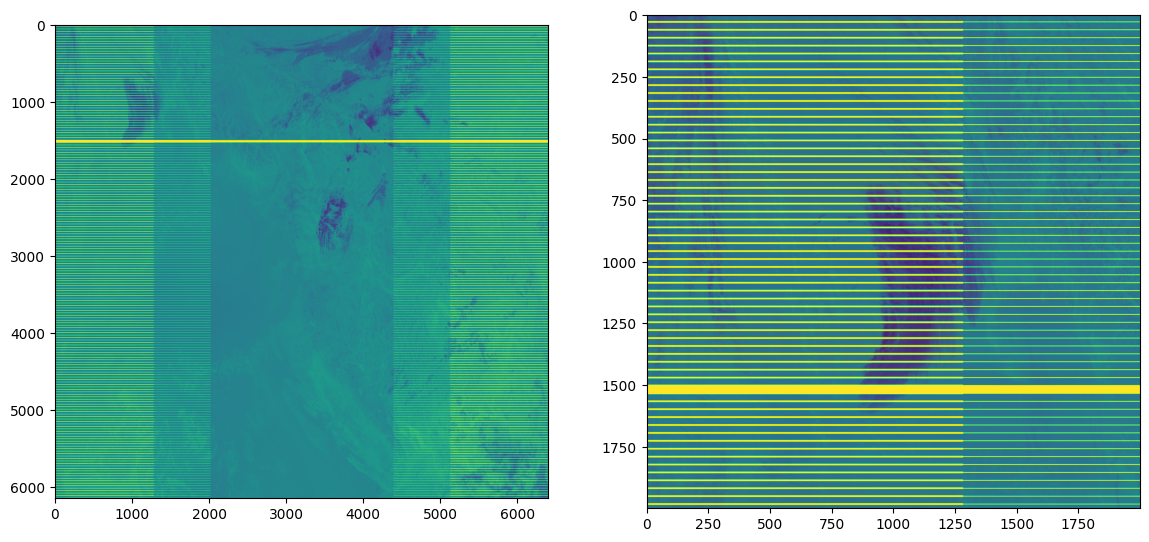

In [13]:
import os
os.chdir("/workspaces/fire-detection/")

import h5py
import numpy as np
import matplotlib.pyplot as plt

test_file = "data/GIMGO-SVI04-SVI05_j01_d20220722_t1003522_e1009322_b24219_c20220818221532599234_oebc_ops.h5"


xr = h5py.File(test_file,'r')
bt_4s = xr['All_Data']['VIIRS-I4-SDR_All']['BrightnessTemperature'][:]
bt_4s_sf = xr['All_Data']['VIIRS-I4-SDR_All']['BrightnessTemperatureFactors'][:2]
I4_bt_arr = np.array(bt_4s*bt_4s_sf[0]+bt_4s_sf[1])

fig,axes = plt.subplots(figsize=(14,8),ncols=2)
ax0,ax1 = axes.flat
ax0.imshow(I4_bt_arr)
ax1.imshow(I4_bt_arr[:2000,:2000])
plt.show()

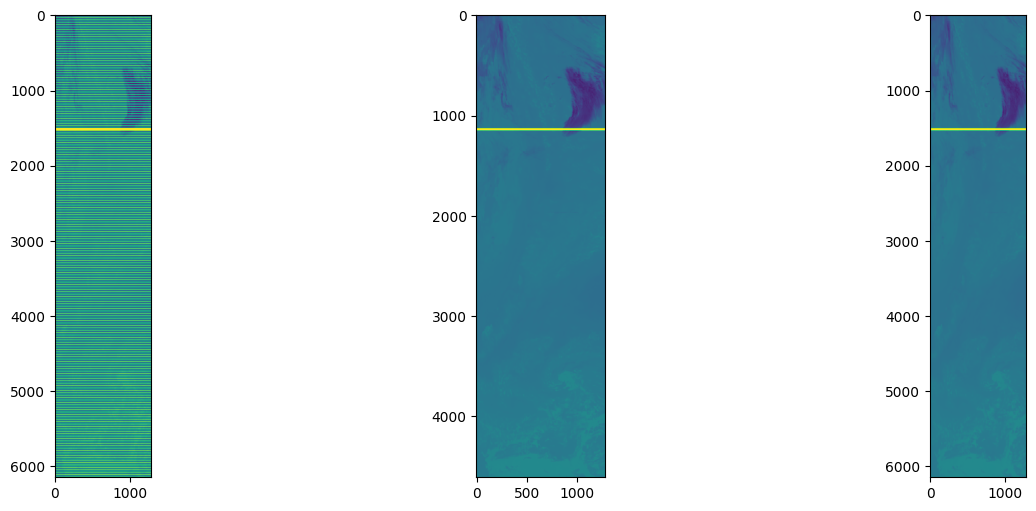

In [15]:
# some magic numbers for VIIRS aggregation zone definition
def get_delete_list(agg_zone:int)->np.array:
    nx = 1536*4
    ny = 6400
    if agg_zone == 1:
        crop_list = [0,1,2,3,28,29,30,31]
    elif agg_zone == 2:
        crop_list = [0,1,30,31]

    agg_crop_list = []
    for i in crop_list:
        agg_crop_list.append(32*np.arange(int(nx/32))+i)
    agg_crop_list = np.array(agg_crop_list).reshape(-1)
    return agg_crop_list


from skimage.transform import resize

agg1_crop_list = get_delete_list(1)
agg2_crop_list = get_delete_list(2)

viirs_agg_list=[1279,2015,3199,4383,5119,6399]

agg_zone_1 = I4_bt_arr[:,:viirs_agg_list[0]]
nx1,ny1 = agg_zone_1.shape
agg_zone_1_del = np.delete(agg_zone_1, agg1_crop_list, 0)
agg_zone_1_resize = resize(agg_zone_1_del,(nx1,ny1),order=2)

fig,axes = plt.subplots(figsize=(16,6),ncols=3)
ax0,ax1,ax2 = axes.flat
ax0.imshow(agg_zone_1)
ax1.imshow(agg_zone_1_del)
ax2.imshow(agg_zone_1_resize)
plt.show()


In [ ]:

    VIIRS_Arr_sub=VIIRS_Arr[:,(slicelist[i_sub]+1):(slicelist[i_sub+1]+1)]
    if i_sub==0 or i_sub==5:
        return np.delete(VIIRS_Arr_sub, deletelist_agg1, 0)
    elif i_sub==1 or i_sub==4:
        return np.delete(VIIRS_Arr_sub, deletelist_agg2, 0)